# Cinephiles Final Project Submission #

Yasitha De Alwis, Andrew Hendricks, and Kendall McNeil

September 15, 2023

## Objective

Identify the most influential factors affecting the profitability of movie making and make recommendations on the identified variables.

#### Import required packages

In [199]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats

import seaborn as sns
from mpl_toolkits import mplot3d

import sklearn.metrics as metrics
import statsmodels.api as sm
import sqlite3

## Import different databases and covert them to dataframes

#### Import movie table and transform data for analysis

In [200]:
df_budget= pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz', compression='gzip')

In [201]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Checking the data types and composition of the table

In [202]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Converting production budget, worldwide gross to float format

In [203]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(",", "")
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace("$", "").astype(float)
df_budget['production_budget'] = df_budget['production_budget'].str.replace(",", "")
df_budget['production_budget'] = df_budget['production_budget'].str.replace("$", "").astype(float)

Generate profitability ratio to normalize revenue information

In [204]:
df_budget['Profitability_Ratio'] = df_budget['worldwide_gross']/df_budget['production_budget']

In [205]:
df_budget.describe()

,id,production_budget,worldwide_gross,Profitability_Ratio
count,5782.000000,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,9.148746e+07,4.800161
std,28.821076,4.181208e+07,1.747200e+08,29.530282
min,1.000000,1.100000e+03,0.000000e+00,0.000000
25%,25.000000,5.000000e+06,4.125415e+06,0.492296
50%,50.000000,1.700000e+07,2.798445e+07,1.708310
75%,75.000000,4.000000e+07,9.764584e+07,3.758346
max,100.000000,4.250000e+08,2.776345e+09,1800.000000


Remove the outlier profitability ratio greater than 60. The rationale is to consider datapoints within two standard deviations.(Later on we decided to keep the outliers and run the analysis and look at medians to reduce the impact of outliers.

In [206]:
#df_budget = df_budget.loc[(df_budget['Profitability_Ratio']<=60)]

Categorize the profitability ratios into Loss,Low Profit, Medium Profit, high profit and super profit in a new colum called prof_cat 

In [207]:
#df_budget['prof_cat'] = ['Loss' if x < 0 else 'Low Profit' if x < 1 else 'Medium Profit' if x < 3 else 'high Profit' for x in df_budget['Profitability_Ratio']]

df_budget['prof_cat'] = ['Loss' if x < 2 
     else 'Low Profit' if x < 3 
     else 'Medium Profit' if x < 5
     else 'High Profit' if x < 10
     else 'Super Profit'                    
     for x in df_budget['Profitability_Ratio']]

Get the composition of Profitability categories

In [208]:
df_budget['prof_cat'].value_counts(normalize = True)

Loss             0.546697
Medium Profit    0.140955
Low Profit       0.132307
High Profit      0.111034
Super Profit     0.069007
Name: prof_cat, dtype: float64

Categorize the production budget into Low, Medium and high in a new colum called budget_cat

In [209]:
df_budget['Net_Profit'] = df_budget['worldwide_gross']-df_budget['production_budget']

In [210]:
df_budget['budget_cat'] = ['Low' if x < 5000000 
     else 'Medium' if x < 50000000 
     else 'High' 
     for x in df_budget['production_budget']]

In [211]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,Net_Profit,budget_cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,6.532577,High Profit,2.351345e+09,High
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2.546673,Low Profit,6.350639e+08,High
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,0.427892,Loss,-2.002376e+08,High
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,4.243841,Medium Profit,1.072414e+09,High
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,4.153696,Medium Profit,9.997217e+08,High


In [212]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5782 non-null   int64  
 1   release_date         5782 non-null   object 
 2   movie                5782 non-null   object 
 3   production_budget    5782 non-null   float64
 4   domestic_gross       5782 non-null   object 
 5   worldwide_gross      5782 non-null   float64
 6   Profitability_Ratio  5782 non-null   float64
 7   prof_cat             5782 non-null   object 
 8   Net_Profit           5782 non-null   float64
 9   budget_cat           5782 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 451.8+ KB


#### Import tmdb.movies table

In [213]:
df_movies = pd.read_csv(r'zippedData\tmdb.movies.csv.gz', compression='gzip')

In [214]:
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [215]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### Import rt.reviews table

In [216]:
df_review = pd.read_csv(r'zippedData/rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')

In [217]:
df_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [218]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### Import im.db table

In [219]:
conn = sqlite3.connect('zippedData/im.db/im.db/')

In [220]:
pd.read_sql("""
SELECT *
FROM sqlite_master

""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Entity relationship diagram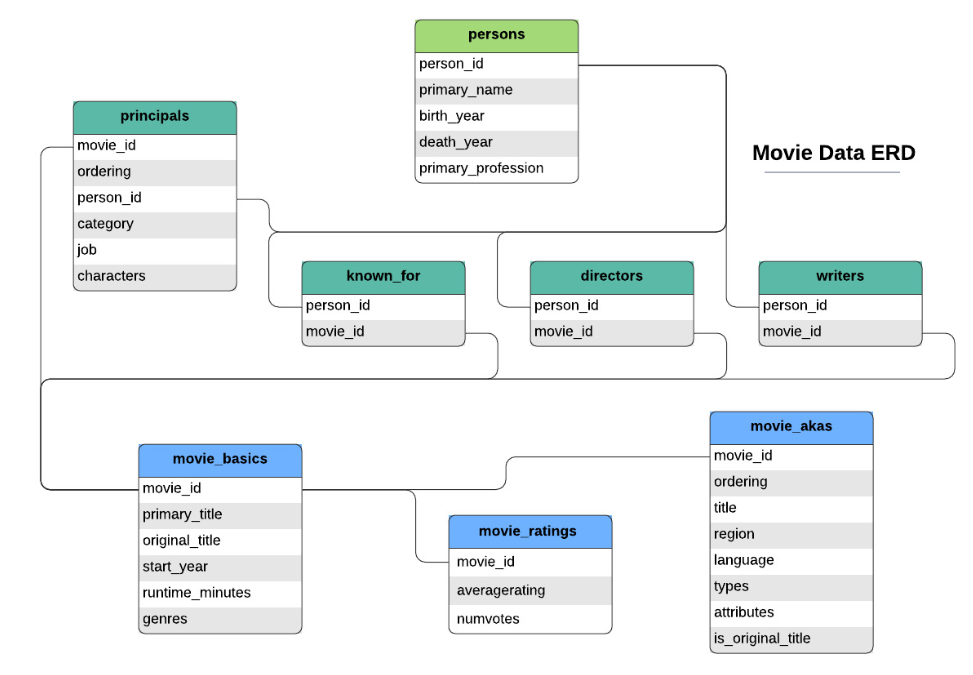

#### Import rt.movie_info table

In [221]:
df_movie_info = pd.read_csv(r'zippedData/rt.movie_info.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')

In [222]:
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [223]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


#### Import bom.movie_gross table

In [224]:
df_bom = pd.read_csv(r'zippedData/bom.movie_gross.csv.gz', compression='gzip')

In [225]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [226]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## 1. Identify the relationship between Genres and Profitability

### 1.1 Primary Analysis

Assign movie basic information to df_movie_basic dataframe

In [227]:
df_movie_basic= pd.read_sql("""
SELECT *
  FROM movie_basics
      
""", conn)

In [228]:
df_movie_basic['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Crime,Western                     1
Fantasy,Music,Sci-Fi              1
Biography,Crime,Romance           1
Action,Documentary,Musical        1
Animation,History,Music           1
Name: genres, Length: 1085, dtype: int64

In [229]:
df_movie_basic['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Crime,Western                     1
Fantasy,Music,Sci-Fi              1
Biography,Crime,Romance           1
Action,Documentary,Musical        1
Animation,History,Music           1
Name: genres, Length: 1085, dtype: int64

Merge budget table and movie basic table to test the relationship between Generes and profitability ratio

In [230]:
merged_budgets_and_movie_basic = df_movie_basic.merge(df_budget, left_on='primary_title', right_on='movie', how='inner')

In [231]:
merged_budgets_and_movie_basic['genres'].value_counts()

Drama                           497
Documentary                     290
Comedy                          140
Comedy,Drama                    104
Horror                           95
                               ... 
Action,Documentary,Drama          1
Adventure,Fantasy,Horror          1
Action,Biography,Documentary      1
Documentary,Fantasy,Mystery       1
Drama,History,Sport               1
Name: genres, Length: 345, dtype: int64

Removed Genres with a sample size of less than 30 as the statistical test could be skewed with categories with too small of a sample size.

In [232]:
merged_budgets_and_movie_basic = merged_budgets_and_movie_basic[merged_budgets_and_movie_basic['genres'].map(merged_budgets_and_movie_basic['genres'].value_counts()) >= 30]

Check for null values in the table

In [233]:
merged_budgets_and_movie_basic.isna().sum()

movie_id                 0
primary_title            0
original_title           0
start_year               0
runtime_minutes        300
genres                   0
id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
Profitability_Ratio      0
prof_cat                 0
Net_Profit               0
budget_cat               0
dtype: int64

In [234]:
merged_budgets_and_movie_basic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,Net_Profit,budget_cat
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,20000000.0,"$70,433,227",122133227.0,6.106661,High Profit,102133227.0,Medium
5,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,0.372532,Loss,-15686698.0,Medium
6,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,0.372532,Loss,-15686698.0,Medium
7,tt4339118,On the Road,On the Road,2014,89.0,Drama,17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,0.372532,Loss,-15686698.0,Medium
8,tt5389486,On the Road,On the Road,2015,39.0,Documentary,17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,0.372532,Loss,-15686698.0,Medium


Conduct chi-square test to test the significance of below hypothesis

H0 : There is no significant relationship between Genere and profitability category.

H1 : There is a significant relationship between Genere and profitability category.

Generate cross tab for chi-square test

In [235]:
contingency_table=pd.crosstab(index=merged_budgets_and_movie_basic["genres"],columns=merged_budgets_and_movie_basic["prof_cat"])

In [236]:
contingency_table

prof_cat,High Profit,Loss,Low Profit,Medium Profit,Super Profit
genres,,,,,
Action,1,32,4,8,1
"Action,Adventure,Comedy",1,13,2,13,4
"Action,Adventure,Drama",1,22,4,7,0
"Action,Adventure,Fantasy",4,16,11,10,0
"Action,Adventure,Sci-Fi",16,14,12,16,0
"Action,Comedy,Crime",4,19,8,6,0
"Action,Crime,Drama",5,40,8,8,2
"Action,Crime,Thriller",2,19,5,4,0
"Action,Thriller",3,18,4,7,0


Conduct chi-square test for statistical significance

In [237]:
stats.contingency.chi2_contingency(contingency_table)

(331.4351129591015,
 9.116739905146841e-29,
 92,
 array([[  3.91996234,  27.4613936 ,   5.17608286,   6.32391714,
           3.11864407],
        [  2.81214689,  19.70056497,   3.71327684,   4.53672316,
           2.23728814],
        [  2.89736347,  20.29755179,   3.82580038,   4.67419962,
           2.30508475],
        [  3.49387947,  24.47645951,   4.61346516,   5.63653484,
           2.77966102],
        [  4.94256121,  34.6252354 ,   6.52636535,   7.97363465,
           3.93220339],
        [  3.15301318,  22.08851224,   4.163371  ,   5.086629  ,
           2.50847458],
        [  5.36864407,  37.61016949,   7.08898305,   8.66101695,
           4.27118644],
        [  2.55649718,  17.90960452,   3.37570621,   4.12429379,
           2.03389831],
        [  2.72693032,  19.10357815,   3.6007533 ,   4.3992467 ,
           2.16949153],
        [  6.22080979,  43.58003766,   8.21421846,  10.03578154,
           4.94915254],
        [ 11.93032015,  83.57815443,  15.75329567,  19.246704

As indicated above, we can reject the null hypothesis at 95% confidence level. Therefore, through the chi-square test it is proven that there is a significant relationship between genere and profitability ratio.

#### 1.2 Secondary Analysis A

To identify which category of genere shows highest profitability.

In [238]:
merged_budgets_and_movie_basic_1 = merged_budgets_and_movie_basic.groupby(merged_budgets_and_movie_basic['genres']).median()

In [239]:
merged_budgets_and_movie_basic_des = merged_budgets_and_movie_basic_1.sort_values(by=['Profitability_Ratio'],ascending=False).head(10)
merged_budgets_and_movie_basic_des

,start_year,runtime_minutes,id,production_budget,worldwide_gross,Profitability_Ratio,Net_Profit
genres,,,,,,,
"Horror,Mystery,Thriller",2015.0,89.0,60.0,10000000.0,54104225.0,5.410423,44104225.0
"Action,Adventure,Comedy",2016.0,107.0,46.0,90000000.0,245328374.0,3.611787,141751370.0
"Action,Adventure,Sci-Fi",2014.0,127.5,41.5,170000000.0,466288586.5,3.243793,335625934.5
"Adventure,Animation,Comedy",2015.0,93.0,46.0,80000000.0,274392649.0,2.800777,159517956.0
"Action,Adventure,Fantasy",2016.0,113.5,51.0,110000000.0,250700000.0,2.278165,129276941.0
"Comedy,Romance",2013.0,102.5,57.0,18000000.0,36882378.0,2.166812,14001741.0
"Comedy,Drama,Romance",2012.5,98.0,54.5,8000000.0,13410297.5,1.953925,4285361.0
"Action,Comedy,Crime",2014.0,104.0,56.0,37000000.0,63129909.0,1.769682,35129909.0
"Drama,Romance",2013.0,105.0,43.0,10100000.0,19535005.0,1.735909,9535005.0


On profitability point of view companies can focus on following genres 
1. Horror ,Mystery, Thriller
2. Action, Adventure, Comedy	
3. Action, Adventure, Sci-Fi	
4. Adventure, Animation, Comedy
5. Action, Adventure, Fantasy

#### 1.3 Visualization

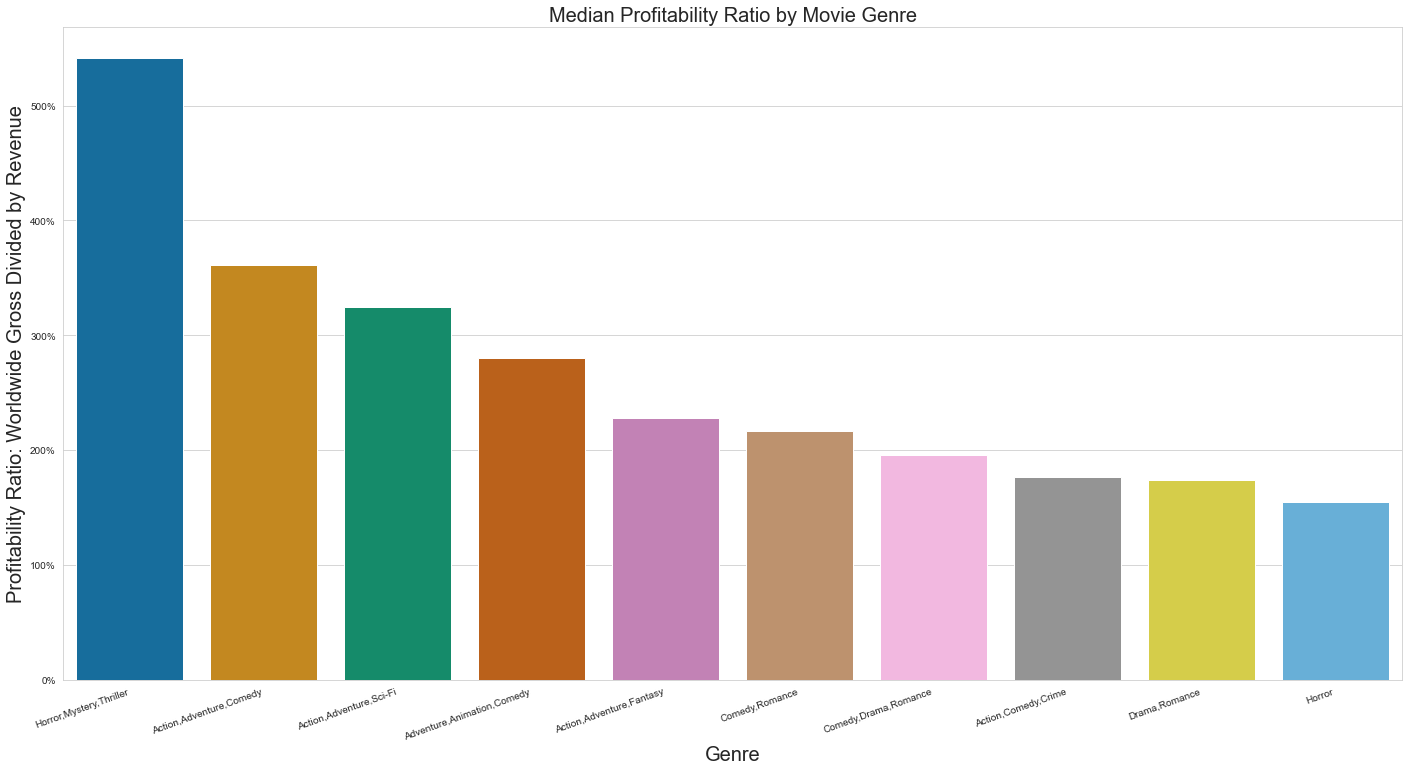

In [240]:
fig, ax = plt.subplots(figsize=(24,12))
sns.set_style("whitegrid")

sns.barplot(x=merged_budgets_and_movie_basic_des.index, y=merged_budgets_and_movie_basic_des['Profitability_Ratio'], palette='colorblind')

ax.set_title('Median Profitability Ratio by Movie Genre', fontsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Profitability Ratio: Worldwide Gross Divided by Revenue', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

**1.4 Secondary Analysis B**

Exploring variables the top profitability ratio genre: horror, mystery, thriller.

1. When are horror, murder, mystery movies released most? 
2. How long are they on average? Median length?
3. What is the average production budget? Median production budget?

In [241]:
horror_mystery_thriller = merged_budgets_and_movie_basic.loc[merged_budgets_and_movie_basic['genres'] == 'Horror,Mystery,Thriller']
horror_mystery_thriller

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,Net_Profit,budget_cat
22,tt0431021,The Possession,The Possession,2012,92.0,"Horror,Mystery,Thriller",81,"Aug 31, 2012",The Possession,14000000.0,"$49,130,588",82925064.0,5.923219,High Profit,68925064.0,Medium
136,tt0837563,Pet Sematary,Pet Sematary,2019,101.0,"Horror,Mystery,Thriller",61,"Apr 5, 2019",Pet Sematary,21000000.0,"$54,724,696",109501146.0,5.214340,High Profit,88501146.0,Medium
137,tt0837563,Pet Sematary,Pet Sematary,2019,101.0,"Horror,Mystery,Thriller",61,"Apr 21, 1989",Pet Sematary,11500000.0,"$57,469,179",57469179.0,4.997320,Medium Profit,45969179.0,Medium
148,tt0872230,My Soul to Take,My Soul to Take,2010,107.0,"Horror,Mystery,Thriller",68,"Oct 8, 2010",My Soul to Take,25000000.0,"$14,744,435",16727470.0,0.669099,Loss,-8272530.0,Medium
365,tt3149900,The Hunted,The Hunted,2013,89.0,"Horror,Mystery,Thriller",28,"Mar 14, 2003",The Hunted,55000000.0,"$34,234,008",47213095.0,0.858420,Loss,-7786905.0,High
642,tt1204977,Ouija,Ouija,2014,89.0,"Horror,Mystery,Thriller",60,"Oct 24, 2014",Ouija,5000000.0,"$50,856,010",103300632.0,20.660126,Super Profit,98300632.0,Medium
800,tt1314655,Devil,Devil,2010,80.0,"Horror,Mystery,Thriller",71,"Sep 17, 2010",Devil,10000000.0,"$33,679,655",63354114.0,6.335411,High Profit,53354114.0,Medium
964,tt4025788,Paranoia,Paranoia,2014,85.0,"Horror,Mystery,Thriller",19,"Aug 16, 2013",Paranoia,40000000.0,"$7,388,654",16340767.0,0.408519,Loss,-23659233.0,Medium
1060,tt1457767,The Conjuring,The Conjuring,2013,112.0,"Horror,Mystery,Thriller",93,"Jul 19, 2013",The Conjuring,20000000.0,"$137,400,141",318000141.0,15.900007,Super Profit,298000141.0,Medium
1123,tt3387542,The Forest,The Forest,2016,93.0,"Horror,Mystery,Thriller",92,"Jan 8, 2016",The Forest,10000000.0,"$26,594,261",40749230.0,4.074923,Medium Profit,30749230.0,Medium


In [242]:
horror_mystery_thriller['release_date'] = pd.to_datetime(horror_mystery_thriller['release_date'])
horror_mystery_thriller['release_month'] = horror_mystery_thriller['release_date'].dt.month

<ipython-input-242-294afae1dfe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_mystery_thriller['release_date'] = pd.to_datetime(horror_mystery_thriller['release_date'])
<ipython-input-242-294afae1dfe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_mystery_thriller['release_month'] = horror_mystery_thriller['release_date'].dt.month


In [243]:
horror_mystery_thriller['release_month'].value_counts()

10    10
9      7
8      6
4      5
2      5
1      5
7      4
3      2
12     1
11     1
5      1
Name: release_month, dtype: int64

In [244]:
horror_mystery_thriller['runtime_minutes'].mean()

91.47826086956522

In [245]:
horror_mystery_thriller['runtime_minutes'].median()

89.0

In [246]:
horror_mystery_thriller['production_budget'].mean()

13031063.829787234

In [247]:
horror_mystery_thriller['production_budget'].median()

10000000.0

## 2. Identify the relationship between Runtime and Profitability

#### 2.1 Primary Analysis

Assign movie basic information to df_movie_basic dataframe

In [248]:
df_runtime = pd.read_sql("""
SELECT *
  FROM movie_basics
      
""", conn)

In [249]:
df_runtime.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Categorize the movie run time into 'Extremly short movie', 'Short Movie', 'Average Movie', 'Long Movie'

In [250]:
df_runtime['Runtime_cat'] = ['Extremly Short Movie' if x < 20 else 'Short Movie' if x < 90 else 'Average Movie' if x < 120 else 'Long Movie' for x in df_runtime['runtime_minutes'] ]

In [251]:
df_runtime.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Runtime_cat
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Long Movie
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Average Movie
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Long Movie
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Long Movie
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Short Movie


Merging movie basic with buget table

In [252]:
merged_runtime_and_budgets = df_budget.merge(df_runtime, left_on='movie', right_on='primary_title', how='inner')

In [253]:
merged_runtime_and_budgets.isna().sum()

id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
Profitability_Ratio      0
prof_cat                 0
Net_Profit               0
budget_cat               0
movie_id                 0
primary_title            0
original_title           1
start_year               0
runtime_minutes        487
genres                  72
Runtime_cat              0
dtype: int64

Removed null values in runtime_minutes column

In [254]:
merged_runtime_and_budgets = merged_runtime_and_budgets.dropna(subset=['runtime_minutes'])

In [255]:
merged_runtime_and_budgets.isna().sum()

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
Profitability_Ratio     0
prof_cat                0
Net_Profit              0
budget_cat              0
movie_id                0
primary_title           0
original_title          0
start_year              0
runtime_minutes         0
genres                 19
Runtime_cat             0
dtype: int64

In [256]:
merged_runtime_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,Net_Profit,budget_cat,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Runtime_cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,6.532577,High Profit,2.351345e+09,High,tt1775309,Avatar,Abatâ,2011,93.0,Horror,Average Movie
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2.546673,Low Profit,6.350639e+08,High,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Long Movie
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,0.427892,Loss,-2.002376e+08,High,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Average Movie
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,4.243841,Medium Profit,1.072414e+09,High,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Long Movie
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,6.827114,High Profit,1.748134e+09,High,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Long Movie


In [257]:
merged_runtime_and_budgets['Runtime_cat'].value_counts()

Average Movie           1808
Short Movie              919
Long Movie               523
Extremly Short Movie      78
Name: Runtime_cat, dtype: int64

Conduct chi-square test to test the significance of below hypothesis

H0 : There is no significant relationship between runtime and profitability category.

H1 : There is a significant relationship between runtime and profitability category.

Generate cross tabs to run chisquare test

In [258]:
contingency_table=pd.crosstab(index=merged_runtime_and_budgets["Runtime_cat"],columns=merged_runtime_and_budgets["prof_cat"])
contingency_table

prof_cat,High Profit,Loss,Low Profit,Medium Profit,Super Profit
Runtime_cat,,,,,
Average Movie,171,1044,246,240,107
Extremly Short Movie,2,46,12,9,9
Long Movie,66,245,75,103,34
Short Movie,76,588,84,87,84


Run chi-square test to identify significance

In [259]:
stats.contingency.chi2_contingency(contingency_table)

(77.80784937046036,
 1.0789456480927762e-11,
 12,
 array([[ 171.12980769, 1044.70673077,  226.54326923,  238.49519231,
          127.125     ],
        [   7.3828125 ,   45.0703125 ,    9.7734375 ,   10.2890625 ,
            5.484375  ],
        [  49.50270433,  302.20222356,   65.53215144,   68.98948317,
           36.7734375 ],
        [  86.98467548,  531.02073317,  115.15114183,  121.22626202,
           64.6171875 ]]))

As indicated above it is possible to reject null hypothesis at 95% confidence level. Therefore through the chi-square test it is proven that there is a significant relationship between runtime and profitability ratio.

#### 2.2 Secondary Analysis

To identify which category of runtime with highest profitability.

In [260]:
merged_budgets_and_movie_basic_1 = merged_runtime_and_budgets.groupby(merged_runtime_and_budgets['Runtime_cat']).median()

In [261]:
merged_budgets_and_movie_basic_1_1 = merged_budgets_and_movie_basic_1.sort_values(by=['Profitability_Ratio'],ascending=False).head()
merged_budgets_and_movie_basic_1_1

,id,production_budget,worldwide_gross,Profitability_Ratio,Net_Profit,start_year,runtime_minutes
Runtime_cat,,,,,,,
Long Movie,47.0,30000000.0,66787173.0,2.241864,27588512.0,2014.0,130.0
Average Movie,52.0,15000000.0,26285719.5,1.507174,7562361.5,2014.0,101.0
Short Movie,50.0,10000000.0,15716828.0,1.298076,965996.0,2014.0,80.0
Extremly Short Movie,55.5,15000000.0,27360534.5,1.266043,2366245.5,2015.0,9.0


#### 2.3 Visualization

''

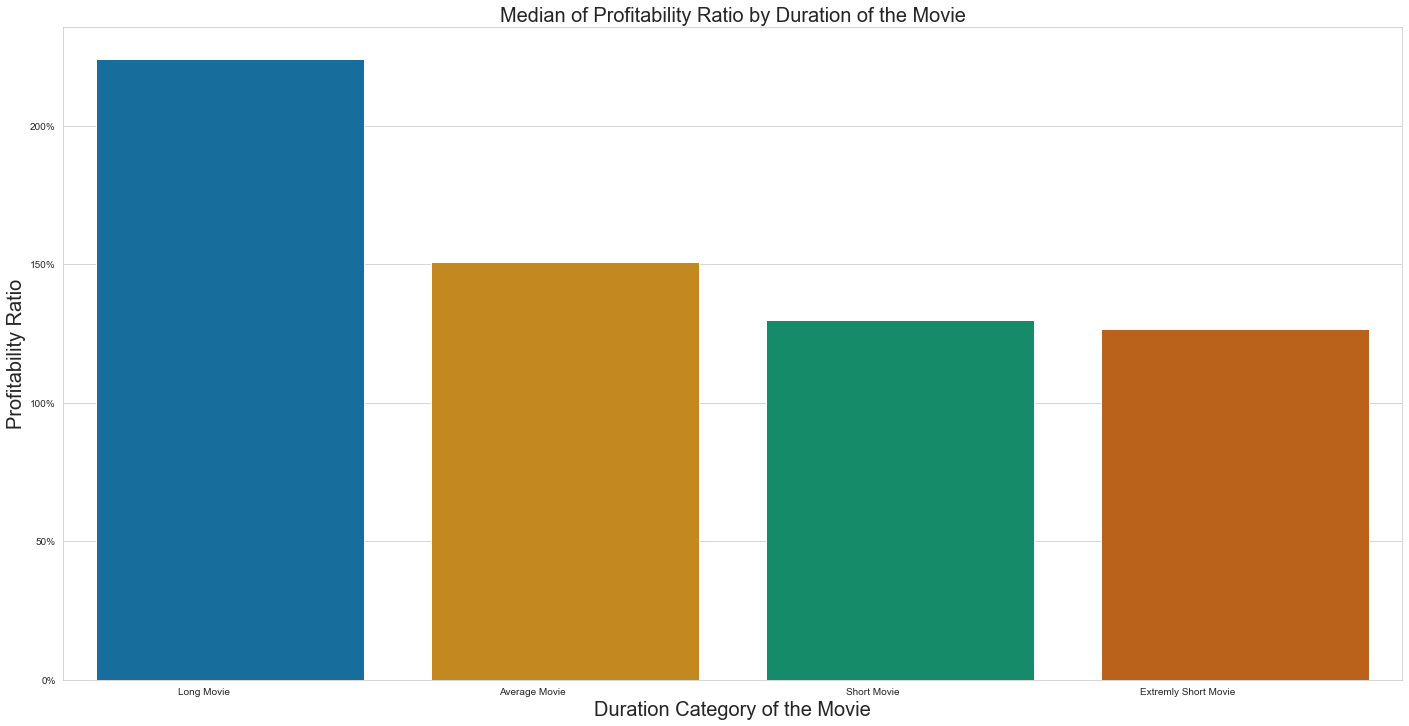

In [262]:
fig, ax = plt.subplots(figsize=(24,12))
sns.set_style("whitegrid")

sns.barplot(x=merged_budgets_and_movie_basic_1_1.index, y=merged_budgets_and_movie_basic_1_1['Profitability_Ratio'],palette="colorblind")

ax.set_title('Median of Profitability Ratio by Duration of the Movie',fontsize=20)
ax.set_xlabel('Duration Category of the Movie',fontsize=20)
ax.set_ylabel('Profitability Ratio',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
ax.axes.yaxis.set_major_formatter(PercentFormatter(1))
;

### 2.4 Create a confidence interval for different categories of runtime

In [263]:
merged_runtime_and_budgets_long=merged_runtime_and_budgets.loc[merged_runtime_and_budgets['Runtime_cat']=='Long Movie']

In [264]:
merged_runtime_and_budgets_long = merged_runtime_and_budgets_long.dropna(subset=['runtime_minutes'])

In [265]:
n = len(merged_runtime_and_budgets_long['runtime_minutes'])
stats.t.interval(alpha = 0.95,                                               
                 loc = np.mean(merged_runtime_and_budgets_long['runtime_minutes']),                              
                 scale = np.std(merged_runtime_and_budgets_long['runtime_minutes'])/np.sqrt(n),
                 df = n-1)

(133.83069858603216, 137.29358439675946)

In [266]:
merged_runtime_and_budgets_AVG=merged_runtime_and_budgets.loc[merged_runtime_and_budgets['Runtime_cat']=='Average Movie']

In [267]:
n = len(merged_runtime_and_budgets_AVG['runtime_minutes'])
stats.t.interval(alpha = 0.95,                                               
                 loc = np.mean(merged_runtime_and_budgets_AVG['runtime_minutes']),                              
                 scale = np.std(merged_runtime_and_budgets_AVG['runtime_minutes'])/np.sqrt(n),
                 df = n-1)

(101.71782503197203, 102.5023077113908)

In [268]:
merged_runtime_and_budgets_Short=merged_runtime_and_budgets.loc[merged_runtime_and_budgets['Runtime_cat']=='Short Movie']

In [269]:
n = len(merged_runtime_and_budgets_Short['runtime_minutes'])
stats.t.interval(alpha = 0.95,                                               
                 loc = np.mean(merged_runtime_and_budgets_Short['runtime_minutes']),                              
                 scale = np.std(merged_runtime_and_budgets_Short['runtime_minutes'])/np.sqrt(n),
                 df = n-1)

(72.2106232210393, 74.24421899876484)

In [270]:
merged_runtime_and_budgets_EShort=merged_runtime_and_budgets.loc[merged_runtime_and_budgets['Runtime_cat']=='Extremly Short Movie']

In [271]:
n = len(merged_runtime_and_budgets_EShort['runtime_minutes'])
stats.t.interval(alpha = 0.95,                                               
                 loc = np.mean(merged_runtime_and_budgets_EShort['runtime_minutes']),                              
                 scale = np.std(merged_runtime_and_budgets_EShort['runtime_minutes'])/np.sqrt(n),
                 df = n-1)

(7.862048764404483, 9.753335850980134)

## 3. Identify the relationship between Average Rating and Profitability

#### 3.1 Primary Analysis

Pull title wise movie rating using movie_basics and movie_ratings tables

In [272]:
df_rating= pd.read_sql("""
SELECT DISTINCT m.primary_title,m.original_title,mr.averagerating 
  FROM movie_basics as m
  JOIN movie_ratings as mr
      USING(movie_id)
""", conn)

In [273]:
df_rating.head()

,primary_title,original_title,averagerating
0,Sunghursh,Sunghursh,7.0
1,One Day Before the Rainy Season,Ashad Ka Ek Din,7.2
2,The Other Side of the Wind,The Other Side of the Wind,6.9
3,Sabse Bada Sukh,Sabse Bada Sukh,6.1
4,The Wandering Soap Opera,La Telenovela Errante,6.5


Merge movie ratings table with profitablity table

In [274]:
merged_ratings_and_budgets = df_budget.merge(df_rating, left_on='movie', right_on='primary_title', how='inner')

In [275]:
merged_ratings_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,Net_Profit,budget_cat,primary_title,original_title,averagerating
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,6.532577,High Profit,2.351345e+09,High,Avatar,Abatâ,6.1
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2.546673,Low Profit,6.350639e+08,High,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,6.6
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,0.427892,Loss,-2.002376e+08,High,Dark Phoenix,Dark Phoenix,6.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,4.243841,Medium Profit,1.072414e+09,High,Avengers: Age of Ultron,Avengers: Age of Ultron,7.3
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,6.827114,High Profit,1.748134e+09,High,Avengers: Infinity War,Avengers: Infinity War,8.5


In [276]:
merged_ratings_and_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2864 non-null   int64  
 1   release_date         2864 non-null   object 
 2   movie                2864 non-null   object 
 3   production_budget    2864 non-null   float64
 4   domestic_gross       2864 non-null   object 
 5   worldwide_gross      2864 non-null   float64
 6   Profitability_Ratio  2864 non-null   float64
 7   prof_cat             2864 non-null   object 
 8   Net_Profit           2864 non-null   float64
 9   budget_cat           2864 non-null   object 
 10  primary_title        2864 non-null   object 
 11  original_title       2864 non-null   object 
 12  averagerating        2864 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 313.2+ KB


Scatter plot to understand the relationship

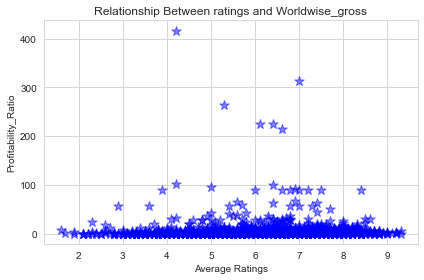

In [277]:
fig, ax = plt.subplots(figsize=(6, 4))

# These are all arguments that go in the plot's function
ax.scatter(merged_ratings_and_budgets['averagerating'], merged_ratings_and_budgets['Profitability_Ratio'],
           c='blue',
           alpha=0.5,
           s=100,
           marker='*')

ax.set_xlabel('Average Ratings')
ax.set_ylabel('Profitability_Ratio')
ax.set_title('Relationship Between ratings and Worldwise_gross')

plt.tight_layout()

#### 3.2 Correlation test for Relationship

Test the correlation between two average rating and profitability ratio.

In [278]:
x = merged_ratings_and_budgets['averagerating'] 
y = merged_ratings_and_budgets['Profitability_Ratio']


r = np.corrcoef(x, y)
r

array([[1.        , 0.01179055],
       [0.01179055, 1.        ]])

The correlation between average rating and profitability is 0.01. This indicate there is no relationship between rating and profitability.

## 4. Identify the relationship between Profile and Profitability

#### 4.1 Primary Analysis

In [279]:
df_dir= pd.read_sql("""
SELECT DISTINCT m.movie_id,m.primary_title as primary_title ,m.original_title,p.primary_name,p.primary_profession
  FROM movie_basics as m
  JOIN directors as d
      USING(movie_id)
  JOIN persons as p
      USING(person_id)
""", conn)

In [280]:
df_dir.head()

,movie_id,primary_title,original_title,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,Harnam Singh Rawail,"director,writer,producer"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,Mani Kaul,"director,writer,actor"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,Orson Welles,"actor,director,writer"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,Hrishikesh Mukherjee,"director,editor,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,Raoul Ruiz,"director,writer,producer"


In [281]:
merged_directors_and_budgets = df_budget.merge(df_dir, left_on='movie', right_on='primary_title', how='inner')

In [282]:
merged_directors_and_budgets.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
Profitability_Ratio    0
prof_cat               0
Net_Profit             0
budget_cat             0
movie_id               0
primary_title          0
original_title         0
primary_name           0
primary_profession     9
dtype: int64

In [283]:
merged_directors_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,Net_Profit,budget_cat,movie_id,primary_title,original_title,primary_name,primary_profession
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,6.532577,High Profit,2.351345e+09,High,tt1775309,Avatar,Abatâ,Atsushi Wada,director
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2.546673,Low Profit,6.350639e+08,High,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,"director,miscellaneous,producer"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,0.427892,Loss,-2.002376e+08,High,tt6565702,Dark Phoenix,Dark Phoenix,Simon Kinberg,"producer,writer,director"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,4.243841,Medium Profit,1.072414e+09,High,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,Joss Whedon,"writer,producer,director"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,6.827114,High Profit,1.748134e+09,High,tt4154756,Avengers: Infinity War,Avengers: Infinity War,Anthony Russo,"producer,director,writer"


Removing primary profession null values

In [284]:
merged_directors_and_budgets = merged_directors_and_budgets.dropna(subset=['primary_profession'])

In [285]:
merged_directors_and_budgets.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
Profitability_Ratio    0
prof_cat               0
Net_Profit             0
budget_cat             0
movie_id               0
primary_title          0
original_title         0
primary_name           0
primary_profession     0
dtype: int64

Removing the naming order duplicates

In [286]:
merged_directors_and_budgets.loc[:,'primary_profession'] = merged_directors_and_budgets.loc[:,'primary_profession'].replace({
    'director,writer,producer':'writer,director,producer',
    'producer,director,writer':'writer,director,producer',
    'director,producer,writer':'writer,director,producer',
    'producer,writer,director':'writer,director,producer',
    'writer,producer,director':'writer,director,producer',
    'producer,director,actor' :'director,producer,actor',
    'actor,producer,director' :'director,producer,actor',
    'director,actor,writer': 'writer,director,actor',
    'actor,director,writer' : 'writer,director,actor',
    'director,writer,actor' :'writer,director,actor',
    'actor,writer,director' :'writer,director,actor',
    'director,writer,editor' :'writer,director,editor',
    'actor,director,producer' : 'director,producer,actor',
    'director,editor,writer' : 'writer,director,editor',
    'producer,actor,writer': 'writer,producer,actor',
    'actor,writer,producer' : 'writer,producer,actor',
    'actor,producer,writer' : 'writer,producer,actor',
    'director,actor,producer' : 'director,producer,actor'
    
})

In [287]:
merged_directors_and_budgets['primary_profession'].value_counts()

writer,director,producer                      1298
writer,director,actor                          293
director,producer,actor                        252
writer,director,editor                         188
director                                       158
                                              ... 
writer,producer,actress                          1
music_department,sound_department,director       1
soundtrack,director,writer                       1
actor,producer,editor                            1
miscellaneous,director                           1
Name: primary_profession, Length: 515, dtype: int64

To avoid extream categories get categories with more than or equal to 10

In [288]:
merged_directors_and_budgets_Filter1 = merged_directors_and_budgets[merged_directors_and_budgets['primary_profession'].map(merged_directors_and_budgets['primary_profession'].value_counts()) >= 10]

In [289]:
merged_directors_and_budgets_Filter1['primary_profession'].value_counts().head()

writer,director,producer    1298
writer,director,actor        293
director,producer,actor      252
writer,director,editor       188
director                     158
Name: primary_profession, dtype: int64

Conduct chi-square test to test the significance of below hypothesis

H0: There is no significant relationship between profile and profitability category.

H1: There is a significant relationship between profile and profitability category.

In [290]:
contingency_table=pd.crosstab(index=merged_directors_and_budgets_Filter1['primary_profession'],columns=merged_directors_and_budgets_Filter1['prof_cat'])
contingency_table.head()

prof_cat,High Profit,Loss,Low Profit,Medium Profit,Super Profit
primary_profession,,,,,
"actress,director,writer",1,13,5,5,0
"actress,producer,director",2,13,3,2,1
"assistant_director,director,writer",1,11,0,2,1
"camera_department,cinematographer,director",1,7,1,2,0
"cinematographer,camera_department,director",0,14,1,3,2


In [291]:
stats.contingency.chi2_contingency(contingency_table)

(215.8808168455841,
 0.034925399915939855,
 180,
 array([[2.19143577e+00, 1.39345088e+01, 2.90931990e+00, 3.28715365e+00,
         1.67758186e+00],
        [1.91750630e+00, 1.21926952e+01, 2.54565491e+00, 2.87625945e+00,
         1.46788413e+00],
        [1.36964736e+00, 8.70906801e+00, 1.81832494e+00, 2.05447103e+00,
         1.04848866e+00],
        [1.00440806e+00, 6.38664987e+00, 1.33343829e+00, 1.50661209e+00,
         7.68891688e-01],
        [1.82619647e+00, 1.16120907e+01, 2.42443325e+00, 2.73929471e+00,
         1.39798489e+00],
        [1.46095718e+00, 9.28967254e+00, 1.93954660e+00, 2.19143577e+00,
         1.11838791e+00],
        [1.44269521e+01, 9.17355164e+01, 1.91530227e+01, 2.16404282e+01,
         1.10440806e+01],
        [1.36964736e+00, 8.70906801e+00, 1.81832494e+00, 2.05447103e+00,
         1.04848866e+00],
        [9.13098237e-01, 5.80604534e+00, 1.21221662e+00, 1.36964736e+00,
         6.98992443e-01],
        [1.09571788e+00, 6.96725441e+00, 1.45465995e+00, 1.6

As indicated above it is not possible to reject null hypothesis at 95% confidence level as this is a two tail test. Therefore can conclude that there is no significant relationship between profile and profitability.

## 5. Identify the relationship between Director and Profitability

#### 5.1 Primary Analysis

In [292]:
merged_directors_and_budgets = df_budget.merge(df_dir, left_on='movie', right_on='primary_title', how='inner')

In [293]:
merged_directors_and_budgets['primary_name'].value_counts()

Tim Story             9
David Gordon Green    8
Steven Spielberg      8
Steven Soderbergh     7
Clint Eastwood        7
                     ..
Song Wang             1
Mostafa Kiayee        1
Renzo Aneröd          1
Tim Sisarich          1
Justin Tipping        1
Name: primary_name, Length: 3241, dtype: int64

Consider only directors have done at least 3 movies.

In [294]:
merged_directors_and_budgets_cleaned = merged_directors_and_budgets[merged_directors_and_budgets['primary_name'].map(merged_directors_and_budgets['primary_name'].value_counts()) > 2]

In [295]:
merged_directors_and_budgets_cleaned['primary_name'].value_counts()

Tim Story              9
David Gordon Green     8
Steven Spielberg       8
Clint Eastwood         7
Steven Soderbergh      7
                      ..
Olivier Megaton        3
Jennifer Yuh Nelson    3
Ben Ducker             3
Mikael Håfström        3
Ben Affleck            3
Name: primary_name, Length: 201, dtype: int64

In [296]:
merged_directors_and_budgets_cleaned.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,Net_Profit,budget_cat,movie_id,primary_title,original_title,primary_name,primary_profession
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2.546673,Low Profit,6.350639e+08,High,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,"director,miscellaneous,producer"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,4.243841,Medium Profit,1.072414e+09,High,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,Joss Whedon,"writer,producer,director"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,6.827114,High Profit,1.748134e+09,High,tt4154756,Avengers: Infinity War,Avengers: Infinity War,Anthony Russo,"producer,director,writer"
5,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,6.827114,High Profit,1.748134e+09,High,tt4154756,Avengers: Infinity War,Avengers: Infinity War,Joe Russo,"producer,director,writer"
6,9,"Nov 17, 2017",Justice League,300000000.0,"$229,024,295",6.559452e+08,2.186484,Low Profit,3.559452e+08,High,tt0974015,Justice League,Justice League,Zack Snyder,"producer,director,writer"


Conduct chi-square test to test the significance of below hypothesis

H0: There is no significant relationship between director and profitability category.

H1: There is a significant relationship between director and profitability category.

In [297]:
contingency_table=pd.crosstab(index=merged_directors_and_budgets_cleaned['primary_name'],columns=merged_directors_and_budgets_cleaned['prof_cat'])
contingency_table

prof_cat,High Profit,Loss,Low Profit,Medium Profit,Super Profit
primary_name,,,,,
Adam McKay,0,2,0,2,0
Aj Cross,0,1,1,1,0
Alejandro G. Iñárritu,1,1,0,1,0
Alex Kurtzman,1,1,1,0,0
Alexander Payne,1,1,1,0,0
...,...,...,...,...,...
William De Vital,0,0,3,0,0
Woody Allen,2,0,1,1,0
Yotam Rozin,0,1,1,0,1


In [298]:
stats.contingency.chi2_contingency(contingency_table)

(916.1644782152214,
 0.002628530158443274,
 800,
 array([[0.56198347, 1.41597796, 0.73278237, 0.80991736, 0.47933884],
        [0.4214876 , 1.06198347, 0.54958678, 0.60743802, 0.35950413],
        [0.4214876 , 1.06198347, 0.54958678, 0.60743802, 0.35950413],
        ...,
        [0.4214876 , 1.06198347, 0.54958678, 0.60743802, 0.35950413],
        [0.4214876 , 1.06198347, 0.54958678, 0.60743802, 0.35950413],
        [0.70247934, 1.76997245, 0.91597796, 1.01239669, 0.59917355]]))

At 95% confidence level can reject the null hypothesis. i.e. There is a significant relationship between profitability and director.

#### 5.2 Secondary Analysis

Get into which directors having highest average profitability 

In [299]:
merged_directors_and_budgets_PF = merged_directors_and_budgets_cleaned.groupby(merged_directors_and_budgets_cleaned['primary_name']).median()


In [300]:
merged_directors_and_budgets_PF_1 = merged_directors_and_budgets_PF.sort_values(by=['Profitability_Ratio'],ascending=False).head(10)
merged_directors_and_budgets_PF_1

,id,production_budget,worldwide_gross,Profitability_Ratio,Net_Profit
primary_name,,,,,
Henry Joost,51.0,5000000.0,1.428180e+08,28.563598,137817992.0
Ariel Schulman,51.0,5000000.0,1.428180e+08,28.563598,137817992.0
David F. Sandberg,55.0,15000000.0,3.053849e+08,20.358991,277899733.0
Pierre Coffin,40.0,74500000.0,1.004972e+09,13.314085,929472292.5
Christopher Landon,64.0,7000000.0,7.754217e+07,12.656013,70542174.5
James DeMonaco,67.0,9000000.0,1.115349e+08,12.392765,102534881.0
M. Night Shyamalan,56.0,20000000.0,2.514997e+08,12.265175,169713881.0
James Wan,65.0,90000000.0,7.324474e+08,11.946642,642447390.5
Damien Chazelle,43.0,20000000.0,1.052038e+08,11.808799,45203825.0


Therefore can recommend that movies with above directors are generating highest profitability

#### 5.3 Visualization

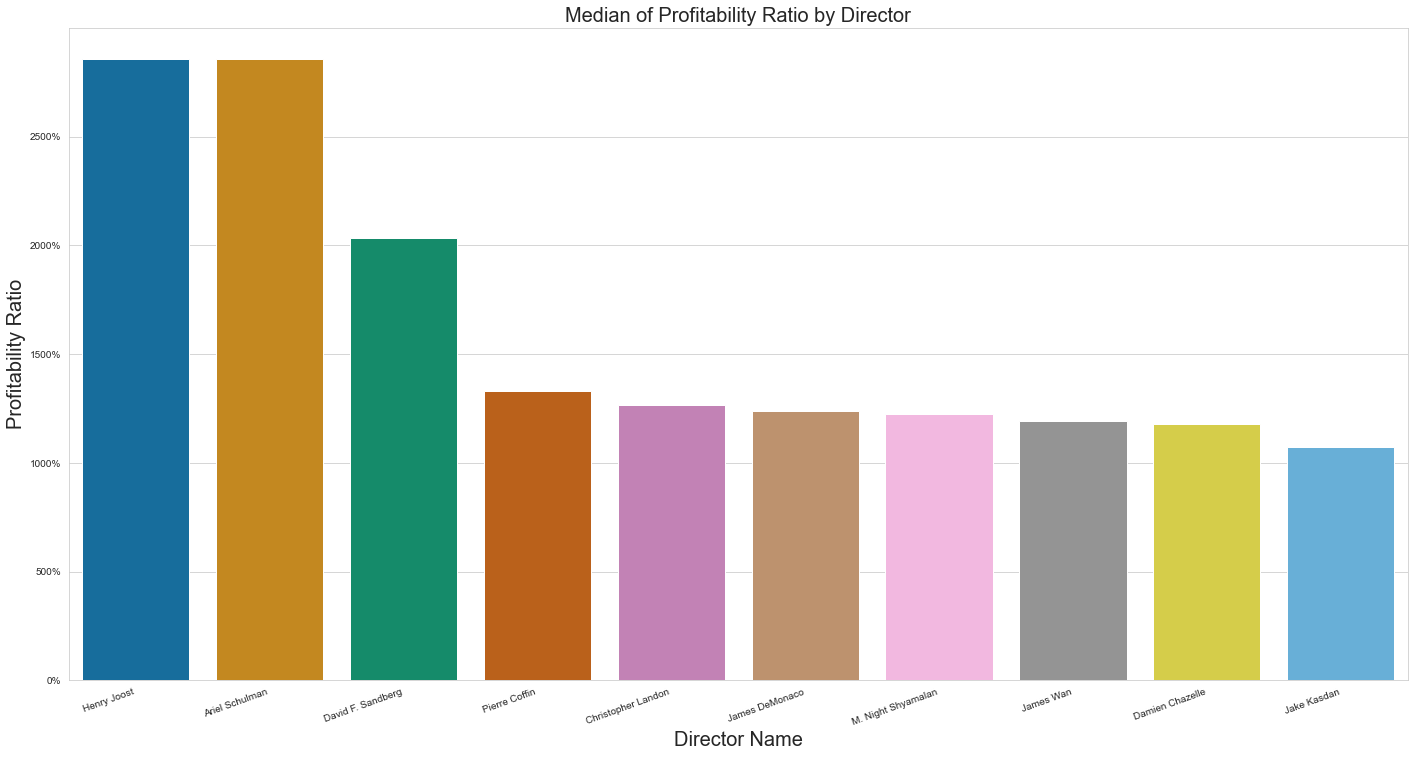

In [301]:
fig, ax = plt.subplots(figsize=(24,12))
sns.set_style("whitegrid")

sns.barplot(x=merged_directors_and_budgets_PF_1.index, y=merged_directors_and_budgets_PF_1['Profitability_Ratio'],palette="colorblind")

ax.set_title('Median of Profitability Ratio by Director',fontsize=20)
ax.set_xlabel('Director Name',fontsize=20)
ax.set_ylabel('Profitability Ratio',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

## 6. Identify the relationship between Actor and Profitability

#### 6.1 Primary Analysis

In [302]:
df_act= pd.read_sql("""
SELECT m.primary_title,p.category, p.characters, pr.primary_name
  FROM movie_basics as m
  JOIN principals as p
      USING(movie_id)
  JOIN persons as pr
      USING(person_id)
WHERE category = 'actor' or category = 'actress'
""", conn)

In [303]:
df_act.head()

,primary_title,category,characters,primary_name
0,A Thin Life,actor,"[""The Man""]",Tommy Dysart
1,The Wicker Tree,actress,"[""Beth Boothby""]",Brittania Nicol
2,The Wicker Tree,actor,"[""Steve Thomson""]",Henry Garrett
3,The Wicker Tree,actor,"[""Sir Lachlan Morrison""]",Graham McTavish
4,The Wicker Tree,actress,"[""Lady Delia Morrison""]",Jacqueline Leonard


In [304]:
merged_actor_and_budgets = df_act.merge(df_budget, left_on='primary_title', right_on='movie', how='left')

In [305]:
merged_actor_and_budgets = merged_actor_and_budgets.loc[merged_actor_and_budgets['worldwide_gross']>=0]

In [306]:
merged_actor_and_budgets['primary_name'].value_counts()

Mark Wahlberg       19
Dwayne Johnson      19
Robert De Niro      18
Liam Neeson         18
Steve Carell        17
                    ..
Ashley Cutrona       1
Giulia Bertini       1
Alparslan Çaglar     1
Alice Englert        1
Anthony Ruivivar     1
Name: primary_name, Length: 8877, dtype: int64

Consider only actors act more than 5 times

In [307]:
merged_actor_and_budgets = merged_actor_and_budgets[merged_actor_and_budgets['primary_name'].map(merged_actor_and_budgets['primary_name'].value_counts()) > 5]

In [308]:
merged_actor_and_budgets['primary_name'].value_counts()

Mark Wahlberg       19
Dwayne Johnson      19
Liam Neeson         18
Robert De Niro      18
Channing Tatum      17
                    ..
Angelina Jolie       6
Ed Harris            6
Chiwetel Ejiofor     6
Elizabeth Banks      6
Ron Perlman          6
Name: primary_name, Length: 275, dtype: int64

Conduct chi-square test to test the significance of below hypothesis

H0: There is no significant relationship between actor and profitability category.

H1 : There is a significant relationship between actor and profitability category.

In [309]:
contingency_table=pd.crosstab(index=merged_actor_and_budgets['primary_name'],columns=merged_actor_and_budgets['prof_cat'])
contingency_table  

prof_cat,High Profit,Loss,Low Profit,Medium Profit,Super Profit
primary_name,,,,,
Aaron Eckhart,0,6,1,2,0
Aaron Taylor-Johnson,0,5,1,3,0
Adam Driver,1,4,1,1,0
Adam Sandler,2,3,2,3,0
Alec Baldwin,2,3,1,1,0
...,...,...,...,...,...
Willem Dafoe,3,1,2,0,0
Woody Harrelson,1,5,2,4,1
Zac Efron,3,3,2,3,1


In [310]:
stats.contingency.chi2_contingency(contingency_table)

(1212.9536854178716,
 0.007582349059443698,
 1096,
 array([[1.13341646, 3.90897756, 1.70199501, 1.82543641, 0.43017456],
        [1.13341646, 3.90897756, 1.70199501, 1.82543641, 0.43017456],
        [0.88154613, 3.04031588, 1.3237739 , 1.41978387, 0.33458022],
        ...,
        [1.51122195, 5.21197007, 2.26932668, 2.43391521, 0.57356608],
        [0.88154613, 3.04031588, 1.3237739 , 1.41978387, 0.33458022],
        [1.0074813 , 3.47464672, 1.51288446, 1.62261014, 0.38237739]]))

As per the statistical test can reject null hypothesis at 95% confidence level. i.e. there is significant relationship between actor and profitability

#### 6.2 Secondary Analysis

To identify with which actors movies profitable

In [311]:
merged_actor_and_budgets_PF = merged_actor_and_budgets.groupby(merged_actor_and_budgets['primary_name']).median()


In [312]:
merged_actor_and_budgets_PF_1 = merged_actor_and_budgets_PF.sort_values(by=['Profitability_Ratio'],ascending=False).head(10)
merged_actor_and_budgets_PF_1

,id,production_budget,worldwide_gross,Profitability_Ratio,Net_Profit
primary_name,,,,,
Octavia Spencer,50.5,14250000.0,116377725.0,8.897834,103127725.0
Bryce Dallas Howard,62.0,45500000.0,160890137.0,6.417967,127881364.5
Jennifer Lawrence,52.0,80000000.0,257878294.0,6.132601,195408305.0
Julianne Moore,25.0,6250000.0,41484095.5,5.975520,34022024.0
Kristen Wiig,36.0,50250000.0,208434920.5,5.932260,109602719.0
Michael B. Jordan,81.5,43500000.0,170708384.0,5.662318,124124685.5
Jim Broadbent,30.5,12500000.0,88834122.5,5.174271,57896632.5
Josh Gad,56.0,23000000.0,352327887.0,4.826409,279327887.0
Ethan Hawke,61.0,3750000.0,40262489.5,4.778239,36762489.5


#### 6.3 Visualization

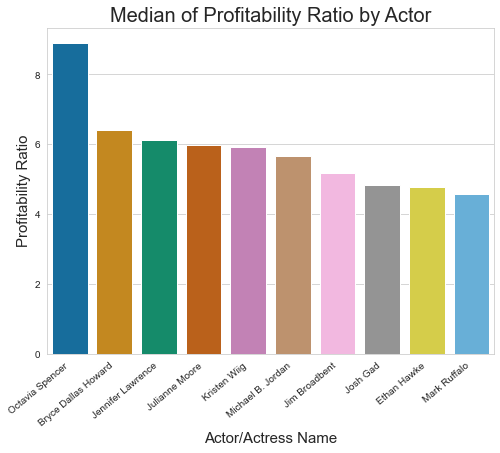

In [313]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style("whitegrid")

sns.barplot(x=merged_actor_and_budgets_PF_1.index, y=merged_actor_and_budgets_PF_1['Profitability_Ratio'],palette="colorblind")

ax.set_title('Median of Profitability Ratio by Actor',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Actor/Actress Name',fontsize=15)
ax.set_ylabel('Profitability Ratio',fontsize=15);

## 7.  Identify the relationship between Production Budget and Profitability

#### 7.1 Primary Analysis

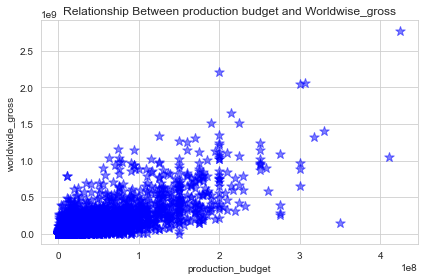

In [314]:
fig, ax = plt.subplots(figsize=(6, 4))

# These are all arguments that go in the plot's function
ax.scatter(df_budget['production_budget'], df_budget['worldwide_gross'],
           c='blue',
           alpha=0.5,
           s=100,
           marker='*')

ax.set_xlabel('production_budget')
ax.set_ylabel('worldwide_gross')
ax.set_title('Relationship Between production budget and Worldwise_gross')

plt.tight_layout()

In [315]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,Net_Profit,budget_cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,6.532577,High Profit,2.351345e+09,High
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2.546673,Low Profit,6.350639e+08,High
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,0.427892,Loss,-2.002376e+08,High
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,4.243841,Medium Profit,1.072414e+09,High
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,4.153696,Medium Profit,9.997217e+08,High


In [316]:
x = df_budget['production_budget']
y = df_budget['worldwide_gross']


r = np.corrcoef(x, y)
r

array([[1.        , 0.74830598],
       [0.74830598, 1.        ]])

There is a positive relationship. Therefore higher the budget higher the profitability.

Application of Chi-Square test

H0 : There is no significant relationship between budget category and profitability category.

H1 : There is a significant relationship between budget category and profitability category.

In [317]:
contingency_table=pd.crosstab(index=df_budget['budget_cat'],columns=df_budget['prof_cat'])
contingency_table

prof_cat,High Profit,Loss,Low Profit,Medium Profit,Super Profit
budget_cat,,,,,
High,125,537,261,266,19
Low,139,855,82,97,209
Medium,378,1769,422,452,171


In [318]:
stats.contingency.chi2_contingency(contingency_table)

(458.73443722657066,
 4.968416939633804e-94,
 8,
 array([[ 134.129367  ,  660.40954687,  159.82704946,  170.27326185,
           83.36077482],
        [ 153.44932549,  755.53476306,  182.84849533,  194.79937738,
           95.36803874],
        [ 354.42130751, 1745.05569007,  422.32445521,  449.92736077,
          220.27118644]]))

As per test statistic can reject null hypothesis at 95% confidence level. Therefore there is a significant relationship between budget category and profitability ratio

#### 7.2 Secondary Analysis

Identify which budget category

In [319]:
merged_pro_and_budgets_PF = df_budget.groupby(df_budget['budget_cat']).median()

In [320]:
merged_actor_and_budgets_PF_1 = merged_pro_and_budgets_PF.sort_values(by=['worldwide_gross'],ascending=False).head(10)
merged_actor_and_budgets_PF_1

,id,production_budget,worldwide_gross,Profitability_Ratio,Net_Profit
budget_cat,,,,,
High,50,80000000.0,184531488.0,2.227965,103210107.0
Medium,51,18000000.0,29876723.0,1.676872,11326278.0
Low,50,1500000.0,840535.5,0.775750,-25159.0


As indicated above High budget category shows higher profitability ratio

# 8. Identify the relationship between Release Month and Profitability

**8.1 Primary Analysis**

Use the datetime function in order to create a release month and release year column in the df_budget dataframe

In [321]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,Net_Profit,budget_cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,6.532577,High Profit,2.351345e+09,High
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2.546673,Low Profit,6.350639e+08,High
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,0.427892,Loss,-2.002376e+08,High
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,4.243841,Medium Profit,1.072414e+09,High
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,4.153696,Medium Profit,9.997217e+08,High
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00,0.000000,Loss,-7.000000e+03,Low
5778,79,"Apr 2, 1999",Following,6000.0,"$48,482",2.404950e+05,40.082500,Super Profit,2.344950e+05,Low
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338",1.338000e+03,0.267600,Loss,-3.662000e+03,Low
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,0.000000e+00,0.000000,Loss,-1.400000e+03,Low


In [322]:
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'])
df_budget['release_month'] = df_budget['release_date'].dt.month
df_budget['release_year'] = df_budget['release_date'].dt.year

Conduct chi-square test to test the significance of below hypothesis. 

H0: There is no significant relationship between release month and profitability category.

H1 : There is a significant relationship between release month and profitability category.

Generate cross tab for chi-square test

In [323]:
contingency_table=pd.crosstab(index=df_budget['release_month'],columns=df_budget['budget_cat'])
contingency_table.sort_values(by='High', ascending=False)

budget_cat,High,Low,Medium
release_month,,,
12,176,182,387
6,152,109,218
11,137,73,276
7,132,104,204
5,117,97,193
3,99,111,260
2,86,82,224
8,80,130,286
10,69,150,354


Conduct chi-square test for statistical significance

In [324]:
stats.contingency.chi2_contingency(contingency_table)

(203.46519858333656,
 2.3843199113954585e-31,
 22,
 array([[ 72.49671394,  82.93912141, 191.56416465],
        [ 81.89830508,  93.69491525, 216.40677966],
        [ 98.1943964 , 112.33829125, 259.46731235],
        [ 94.85160844, 108.51400899, 250.63438257],
        [ 85.0321688 ,  97.28017987, 224.68765133],
        [100.07471463, 114.48945002, 264.43583535],
        [ 91.92666897, 105.16776202, 242.90556901],
        [103.62642684, 118.55274991, 273.82082324],
        [102.9996541 , 117.83569699, 272.16464891],
        [119.71359391, 136.95710827, 316.32929782],
        [101.53718437, 116.1625735 , 268.30024213],
        [155.64856451, 178.06814251, 411.28329298]]))

As per the statistical test can reject null hypothesis at 95% confidence level. i.e. there is significant relationship between release month and profitability.

**8.2 Secondary Analysis A**

To identify which release months are most profitable

In [325]:
budgets_groupedby_month_medians = df_budget.groupby(df_budget['release_month']).median().sort_values(by='Profitability_Ratio', ascending=False)
budgets_groupedby_month_medians

,id,production_budget,worldwide_gross,Profitability_Ratio,Net_Profit,release_year
release_month,,,,,,
6,49.0,21000000.0,46844357.0,2.252110,21129194.0,2006.0
7,50.0,21000000.0,51134699.5,2.244067,21117855.5,2006.0
11,50.0,24000000.0,50530475.5,2.168355,23241650.5,2006.0
5,51.0,16000000.0,29934477.0,2.075749,13609577.0,2006.0
2,48.5,17250000.0,33097834.5,1.740280,10443556.0,2008.0
8,51.0,16000000.0,24202936.5,1.682874,6972068.5,2006.0
12,53.0,19400000.0,31166312.0,1.628805,7836366.0,2007.0
3,51.0,15000000.0,25599836.0,1.531329,7811580.5,2007.0
1,48.0,14000000.0,20169934.0,1.512054,5322212.0,2008.0


**8.3 Visualization**

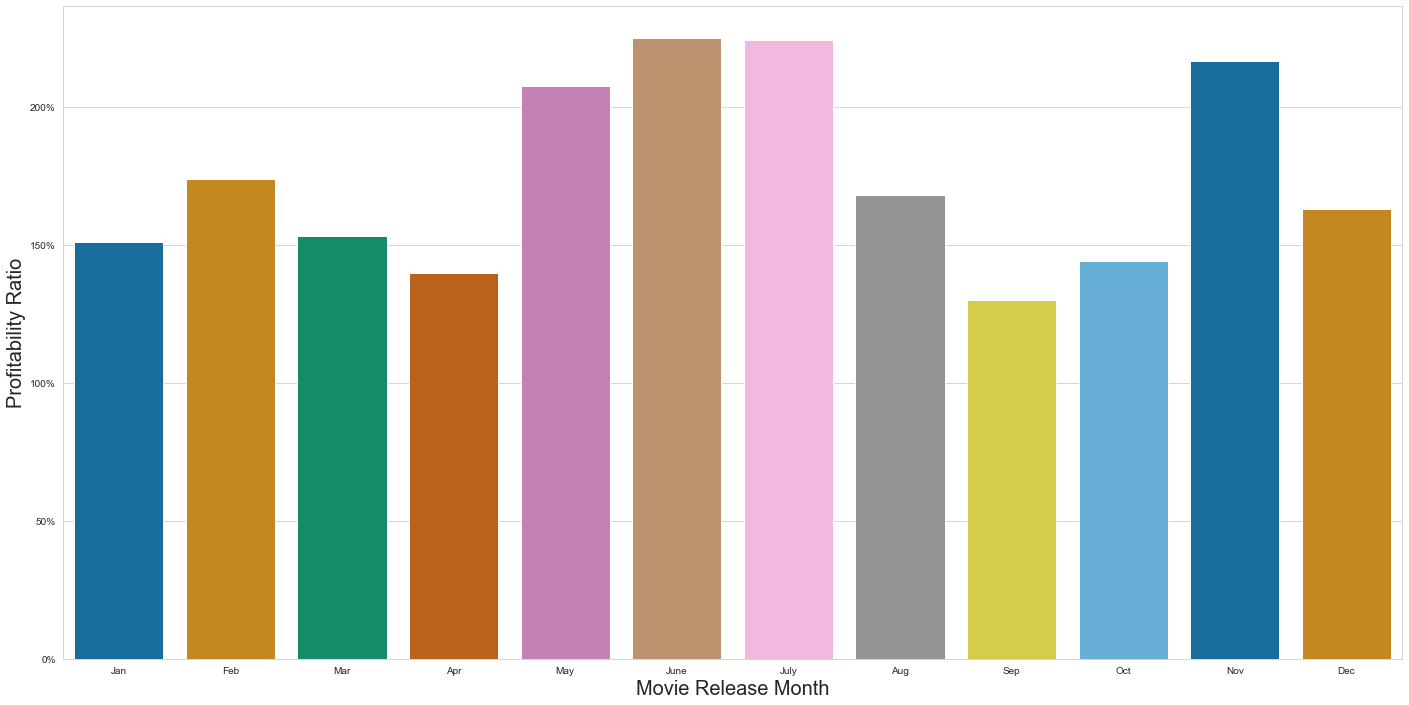

In [326]:
fig, ax = plt.subplots(figsize=(24,12))
sns.set_style("whitegrid")

sns.barplot(x=budgets_groupedby_month_medians.index, y=budgets_groupedby_month_medians['Profitability_Ratio'], palette="colorblind")

ax.set_xlabel('Movie Release Month', fontsize=20)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
ax.set_ylabel('Profitability Ratio', fontsize=20)
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

**8.4 Secondary Analysis B**

Exploring numeric variables specific to the top profitable months of June and July

In [327]:
june_and_july = df_budget.loc[(df_budget['release_month'] == 6) | (df_budget['release_month'] == 7)]

In [328]:
june_and_july.describe()

,id,production_budget,worldwide_gross,Profitability_Ratio,Net_Profit,release_month,release_year
count,919.000000,9.190000e+02,9.190000e+02,919.000000,9.190000e+02,919.000000,919.000000
mean,50.103373,4.283437e+07,1.417764e+08,7.004160,9.894204e+07,6.478781,2002.955386
std,27.941527,5.221186e+07,2.200844e+08,62.780298,1.857459e+08,0.499822,12.548519
min,1.000000,5.000000e+03,0.000000e+00,0.000000,-2.002376e+08,6.000000,1936.000000
25%,27.000000,5.400000e+06,6.447222e+06,0.823003,-4.686455e+05,6.000000,1998.000000
50%,50.000000,2.100000e+07,4.947309e+07,2.252110,2.112919e+07,6.000000,2006.000000
75%,74.000000,6.300000e+07,1.843773e+08,4.469075,1.197498e+08,7.000000,2012.000000
max,100.000000,3.500000e+08,1.648855e+09,1800.000000,1.433855e+09,7.000000,2019.000000


# 9. Identify the relationship between Studio and Profitability

#### 9.1 Primary Analysis

In [329]:
merged_studio = df_budget.merge(df_bom, left_on='movie', right_on='title', how='left')

In [330]:
merged_studio['studio'].value_counts()

Uni.      117
Fox       110
WB        102
Par.       74
Sony       74
         ... 
Strand      1
BBC         1
ELS         1
Viv.        1
BSC         1
Name: studio, Length: 99, dtype: int64

Only including studios with at least 20 movies.

In [331]:
merged_studio = merged_studio[merged_studio['studio'].map(merged_studio['studio'].value_counts()) >= 20]

Conduct chi-square test to test the significance of below hypothesis

H0: There is no significant relationship between studio and profitability category.

H1 : There is a significant relationship between studio and profitability category.

Generate cross tab for chi-square test

In [332]:
contingency_table=pd.crosstab(index=merged_studio['studio'],columns=merged_studio['prof_cat'])
contingency_table

prof_cat,High Profit,Loss,Low Profit,Medium Profit,Super Profit
studio,,,,,
A24,4,10,4,1,2
BV,11,24,11,26,0
Focus,6,17,5,9,2
Fox,16,30,27,34,3
FoxS,9,24,2,5,7
IFC,1,22,1,4,2
LG/S,1,15,5,7,3
LGF,7,19,16,12,7
Magn.,0,16,1,2,1


Chi squared to determine significance level

In [333]:
stats.contingency.chi2_contingency(contingency_table)

(187.9041221779929,
 1.8563617537840966e-11,
 76,
 array([[ 3.0443787 ,  7.9112426 ,  4.01775148,  4.4112426 ,  1.61538462],
        [10.43786982, 27.12426036, 13.77514793, 15.12426036,  5.53846154],
        [ 5.65384615, 14.69230769,  7.46153846,  8.19230769,  3.        ],
        [15.94674556, 41.43984221, 21.04536489, 23.10650888,  8.46153846],
        [ 6.81360947, 17.7061144 ,  8.99211045,  9.87278107,  3.61538462],
        [ 4.34911243, 11.30177515,  5.73964497,  6.30177515,  2.30769231],
        [ 4.49408284, 11.67850099,  5.93096647,  6.51183432,  2.38461538],
        [ 8.84319527, 22.98027613, 11.67061144, 12.81360947,  4.69230769],
        [ 2.89940828,  7.53451677,  3.82642998,  4.20118343,  1.53846154],
        [ 3.91420118, 10.17159763,  5.16568047,  5.67159763,  2.07692308],
        [10.72781065, 27.87771203, 14.15779093, 15.5443787 ,  5.69230769],
        [ 3.62426036,  9.41814596,  4.78303748,  5.25147929,  1.92307692],
        [ 4.0591716 , 10.54832347,  5.35700197,  5

As per the statistical test can reject null hypothesis at 95% confidence level. i.e. there is significant relationship between studio and profitability.

# 10. Identify the relationship between Studio and Profitability

#### 10.1 Primary Analysis

In [334]:
writers = pd.read_sql("""
SELECT mb.primary_title, pr.movie_id, pr.person_ID, pr.category, pe.primary_name
FROM principals AS pr
JOIN persons AS pe
ON pr.person_id = pe.person_id
JOIN movie_basics as mb
ON pr.movie_id = mb.movie_id
WHERE pr.category = 'writer'
;
""", conn)

In [335]:
mergedwriters = df_budget.merge(writers, left_on='movie', right_on='primary_title', how='left')

In [336]:
mergedwriters['primary_name'].value_counts().head(60)

William Shakespeare      29
Stan Lee                 16
Jack Kirby               13
John Logan                8
Carlo Collodi             8
Jane Goldman              7
Stephen McFeely           7
Eric Heisserer            7
Nicholas Stoller          7
Luc Besson                7
Linda Woolverton          7
Jon Spaihts               7
Christopher Markus        7
Phil Hay                  7
Matt Manfredi             7
Rick Jaffa                6
Stephen King              6
Jeff Pinkner              6
Richard Wenk              6
Allan Loeb                6
Hossein Amini             6
Glenn Berger              6
John Morris               6
Robert Mark Kamen         6
Nicholas Sparks           6
Darren Lemke              6
Jonathan Aibel            6
Michael Green             6
Mark Bomback              6
Amanda Silver             6
Evan Spiliotopoulos       5
Evan Goldberg             5
Kurt Wimmer               5
Chris Morgan              5
Dave Callaham             5
Cinco Paul          

Only including studios with at least 5 movies.

In [337]:
mergedwriters = mergedwriters[mergedwriters['primary_name'].map(mergedwriters['primary_name'].value_counts()) >= 5]

In [338]:
mergedwriters['primary_name'].value_counts()

William Shakespeare      29
Stan Lee                 16
Jack Kirby               13
John Logan                8
Carlo Collodi             8
Matt Manfredi             7
Stephen McFeely           7
Nicholas Stoller          7
Phil Hay                  7
Luc Besson                7
Linda Woolverton          7
Jon Spaihts               7
Jane Goldman              7
Christopher Markus        7
Eric Heisserer            7
Amanda Silver             6
Darren Lemke              6
Allan Loeb                6
Glenn Berger              6
Stephen King              6
Mark Bomback              6
Jonathan Aibel            6
Jeff Pinkner              6
Michael Green             6
Richard Wenk              6
Hossein Amini             6
John Morris               6
Nicholas Sparks           6
Robert Mark Kamen         6
Rick Jaffa                6
David Lindsay-Abaire      5
Derek Connolly            5
Michael Arndt             5
Jonathan Goldstein        5
John Gatins               5
Simon Kinberg       

Conduct chi-square test to test the significance of below hypothesis

H0: There is no significant relationship between writer and profitability category.

H1 : There is a significant relationship between writer and profitability category.

Generate cross tab for chi-square test

In [339]:
contingency_table=pd.crosstab(index=mergedwriters['primary_name'],columns=mergedwriters['prof_cat'])
contingency_table

prof_cat,High Profit,Loss,Low Profit,Medium Profit,Super Profit
primary_name,,,,,
Allan Loeb,0,4,2,0,0
Amanda Silver,2,1,0,3,0
Brian Lynch,0,1,1,1,2
Carlo Collodi,0,4,0,0,4
Chris Morgan,2,2,0,1,0
Christopher Markus,1,0,2,4,0
Christopher McQuarrie,1,1,3,0,0
Cinco Paul,1,0,1,0,3
Darren Lemke,0,1,3,2,0


In [340]:
stats.contingency.chi2_contingency(contingency_table)

(359.25126785676076,
 3.6024918080044933e-10,
 208,
 array([[0.87679083, 1.80515759, 1.0487106 , 1.75358166, 0.51575931],
        [0.87679083, 1.80515759, 1.0487106 , 1.75358166, 0.51575931],
        [0.73065903, 1.50429799, 0.8739255 , 1.46131805, 0.42979943],
        [1.16905444, 2.40687679, 1.3982808 , 2.33810888, 0.68767908],
        [0.73065903, 1.50429799, 0.8739255 , 1.46131805, 0.42979943],
        [1.02292264, 2.10601719, 1.2234957 , 2.04584527, 0.6017192 ],
        [0.73065903, 1.50429799, 0.8739255 , 1.46131805, 0.42979943],
        [0.73065903, 1.50429799, 0.8739255 , 1.46131805, 0.42979943],
        [0.87679083, 1.80515759, 1.0487106 , 1.75358166, 0.51575931],
        [0.73065903, 1.50429799, 0.8739255 , 1.46131805, 0.42979943],
        [0.73065903, 1.50429799, 0.8739255 , 1.46131805, 0.42979943],
        [0.73065903, 1.50429799, 0.8739255 , 1.46131805, 0.42979943],
        [1.02292264, 2.10601719, 1.2234957 , 2.04584527, 0.6017192 ],
        [0.73065903, 1.50429799, 0.873

As per the statistical test can reject null hypothesis at 95% confidence level. i.e. there is significant relationship between writer and profitability.

#### 10.2 Secondary Analysis

Identifying writers with the highest median profitability.

In [341]:
writersgrouped = mergedwriters.groupby(mergedwriters['primary_name']).median()

In [342]:
writersgrouped1 = writersgrouped.sort_values(by=['Profitability_Ratio'],ascending=False).head(10)
writersgrouped1

,id,production_budget,worldwide_gross,Profitability_Ratio,Net_Profit,release_month,release_year
primary_name,,,,,,,
Oren Peli,59.0,5000000.0,142817992.0,41.407969,137817992.0,10.0,2012.0
Carlo Collodi,46.0,23644623.5,57990905.5,18.764188,34346282.0,7.0,1971.0
Ken Daurio,27.0,75000000.0,886750534.0,11.823340,811750534.0,7.0,2013.0
Cinco Paul,27.0,75000000.0,886750534.0,11.823340,811750534.0,7.0,2013.0
Robert Mark Kamen,57.0,40000000.0,209235991.0,7.610948,181235991.0,7.0,2011.5
Derek Connolly,77.0,170000000.0,561072059.0,5.896424,376072059.0,6.0,2017.0
Linda Woolverton,51.0,160000000.0,758536735.0,5.127456,588431132.0,5.0,2010.0
Stephen King,43.5,25500000.0,95955333.0,5.105830,52935523.5,8.5,2015.0
Chris Morgan,23.0,175000000.0,630163454.0,4.939385,505163454.0,4.0,2015.0


#### 10.3 Visualization

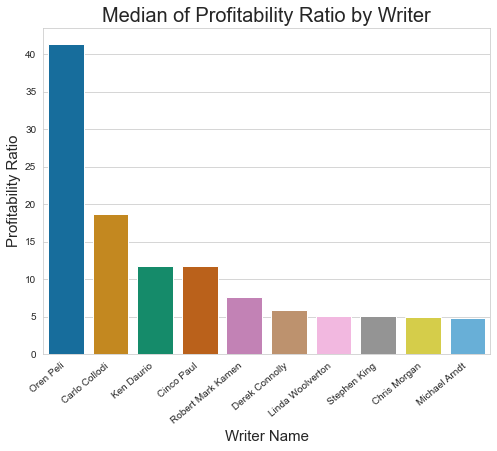

In [343]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style("whitegrid")

sns.barplot(x=writersgrouped1.index, y=writersgrouped1['Profitability_Ratio'],palette="colorblind")

ax.set_title('Median of Profitability Ratio by Writer',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Writer Name',fontsize=15)
ax.set_ylabel('Profitability Ratio',fontsize=15);